In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from  sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
housing = pd.read_csv("house-price\\House_Prices.csv")

In [7]:
housing.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Home            128 non-null int64
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [9]:
#Não a valores não preenchidos 

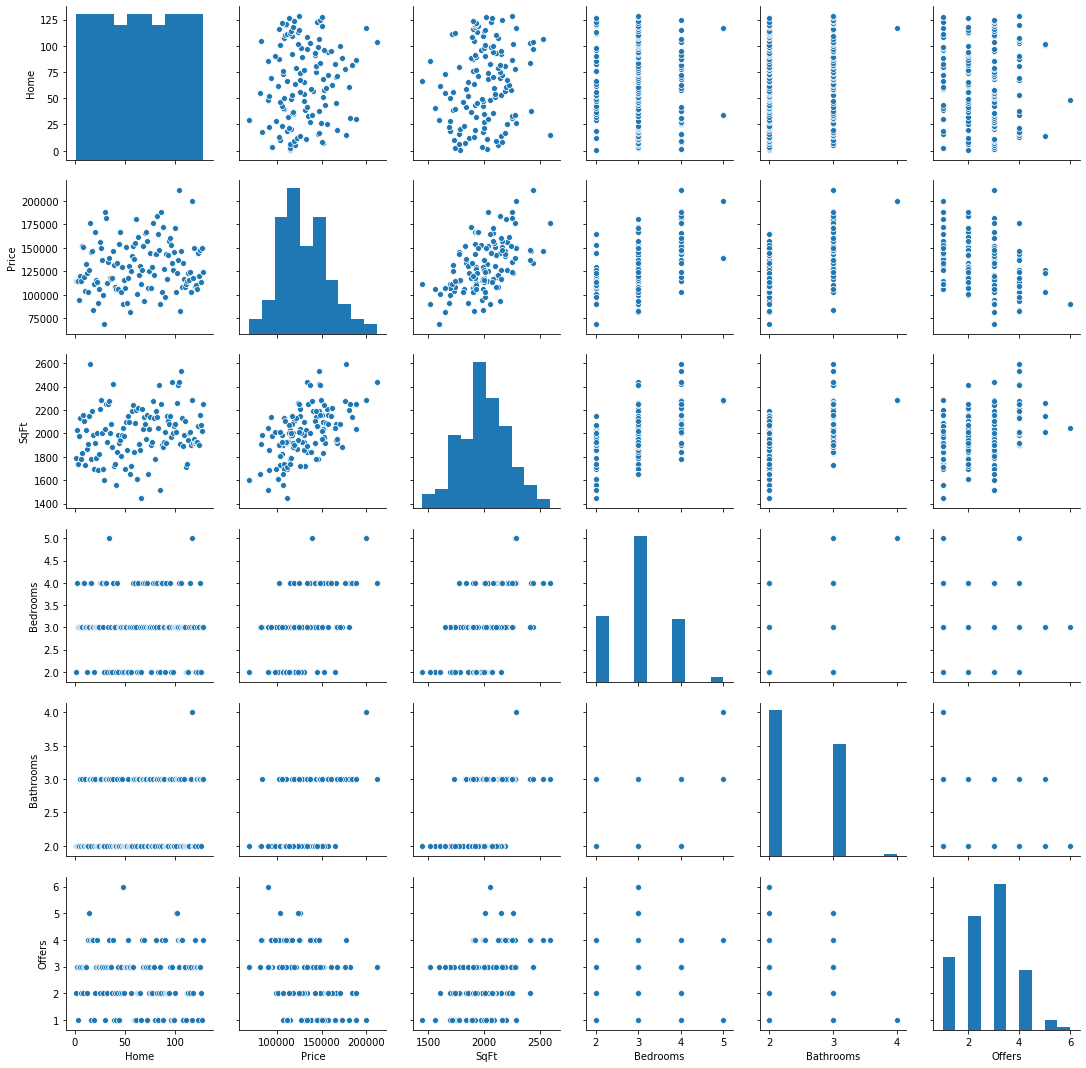

In [10]:
sns.pairplot(housing)

In [11]:

housing["Neighborhood"].unique()

array(['East', 'North', 'West'], dtype=object)

In [12]:
def direction(x):
    if x == "East":
        return 1
    elif x == "North":
        return 2
    elif x == "West":
        return 3
    else:
        return 0

In [13]:
housing["value_Neigh"] = housing["Neighborhood"].apply(lambda x: direction(x) )

In [14]:
housing["value_Neigh"]

0      1
1      1
2      1
3      1
4      1
      ..
123    1
124    1
125    2
126    3
127    2
Name: value_Neigh, Length: 128, dtype: int64

In [15]:
housing

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,value_Neigh
0,1,114300,1790,2,2,2,No,East,1
1,2,114200,2030,4,2,3,No,East,1
2,3,114800,1740,3,2,1,No,East,1
3,4,94700,1980,3,2,3,No,East,1
4,5,119800,2130,3,3,3,No,East,1
...,...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East,1
124,125,147900,2160,4,3,3,Yes,East,1
125,126,113500,2070,2,2,2,No,North,2
126,127,149900,2020,3,3,1,No,West,3


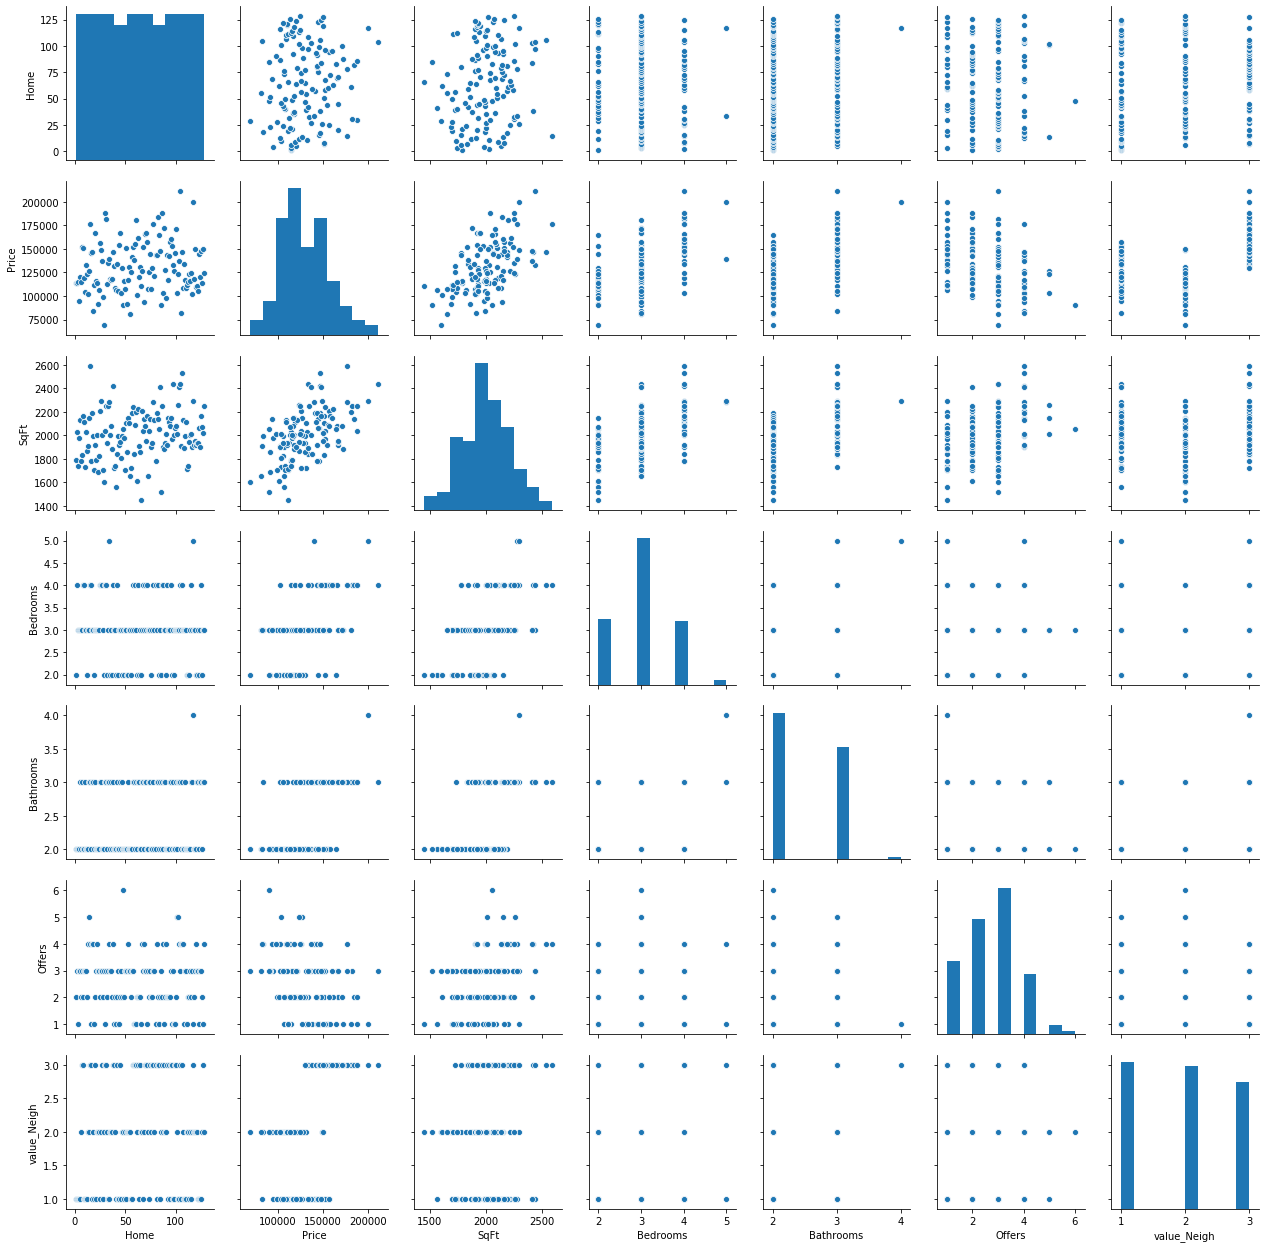

In [16]:
sns.pairplot(housing)

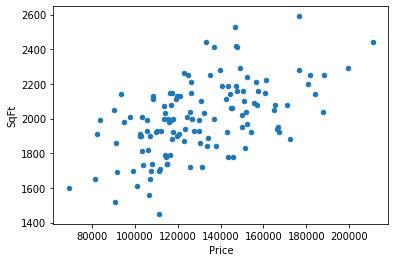

In [17]:
housing.plot(kind  = "scatter", x = "Price", y = "SqFt")

In [18]:
housing.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood', 'value_Neigh'],
      dtype='object')

In [19]:
y = housing["Price"]

In [20]:
x = housing[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers',  'value_Neigh']]

In [21]:
x.columns

Index(['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'value_Neigh'], dtype='object')

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 20)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lr.coef_

array([    57.04088432,   6780.93928683,  12281.8529792 , -12156.54967644,
         8004.2117524 ])

In [27]:
predict = lr.predict(x_test)

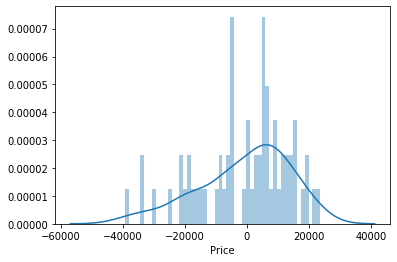

In [28]:
sns.distplot(predict - y_test, bins = 50)

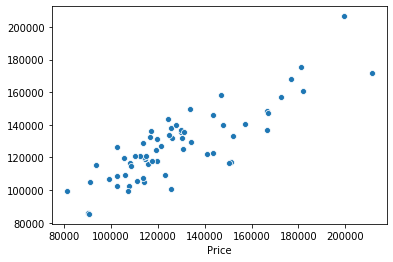

In [29]:
sns.scatterplot(x = y_test, y = predict )

In [30]:
# não esta generalizando bem 

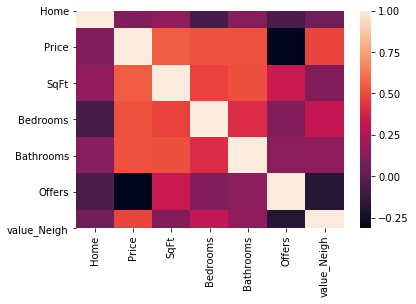

In [31]:
sns.heatmap(housing.corr())

In [35]:
from sklearn import metrics
import numpy as np

In [36]:

print(f"MAE : {metrics.mean_absolute_error(predict, y_test)}")
print(f"MSE : {metrics.mean_squared_error(predict, y_test)}")
print(f"RMSE : {np.sqrt(metrics.mean_squared_error(predict, y_test))}\n\n")
    

MAE : 11689.548560479785
MSE : 210124219.7325867
RMSE : 14495.66210052465


